In [2]:
from os import path
from PIL import Image
from colorthief import ColorThief
import matplotlib.pyplot as plt
import numpy as np

In [16]:
def greenness_rgb(color):
    r, g, b = color
    return g/max(1,b) + g/max(1,r)
    #return g/(r + g + b)

greenness_rgb((33, 59, 27))

def distance_to_perfect_green(color):
    return np.linalg.norm(np.array((0, 255, 0)) - np.array(color))

distance_to_perfect_green((132, 120, 93))

210.47090060148457

In [17]:
DATAPATH = './nolabels'
#TEST_IMAGE = 'kishan_bagh_nolabels.png' # 2 green shades
TEST_IMAGE = 'firewood_consumption_nolabels.png' # 1 shade works
#TEST_IMAGE = 'rao_jodha1_nolabels.png' # 1 shade works
#TEST_IMAGE = 'auroraville_botanical_gardens_nolabels.png' # Prefer only second, 5 palette
#TEST_IMAGE = 'la_joya_nolabels.png' # 1 green shade, 5 or 6 palette
#TEST_IMAGE = 'jussara_nolabels.png' # 2 green shades, 5 or 6 palette


PALETTE_SIZE = 5
MOST_GREEN = 2

[(84, 82, 52), (74, 86, 62), (133, 135, 101), (107, 107, 82), (132, 120, 93)]


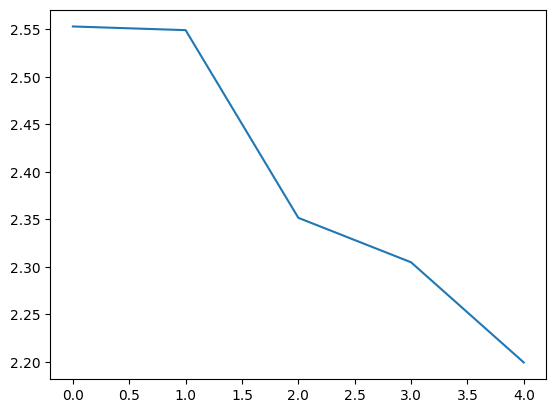

In [9]:
image_path = path.join(DATAPATH, TEST_IMAGE)

image = Image.open(image_path)
ct = ColorThief(image_path)
palette = ct.get_palette(color_count=PALETTE_SIZE)
palette.sort(key = lambda x: greenness_rgb(x), reverse = True)

# This dict will be used to determine which of the MOST_GREEN colors will be used
# If this code block is active, I refer to it as "throwaway" in the documentation cell
used_colors = {i: True for i in range(MOST_GREEN)}
'''
for i in range(MOST_GREEN):
    r, g, b = palette[i]
    if r > g or b > g:
        used_colors[i] = False
'''
print(palette)

x = np.arange(0, PALETTE_SIZE, 1)
y = list(map(greenness_rgb, palette))

plt.plot(x, y)
plt.show()

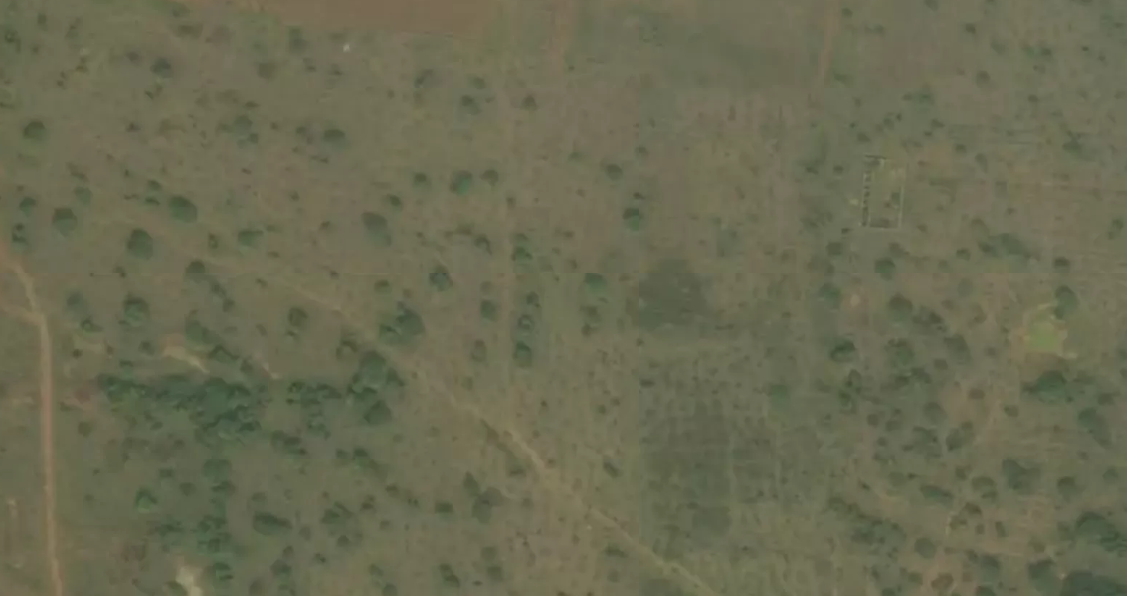

In [12]:
display(image)

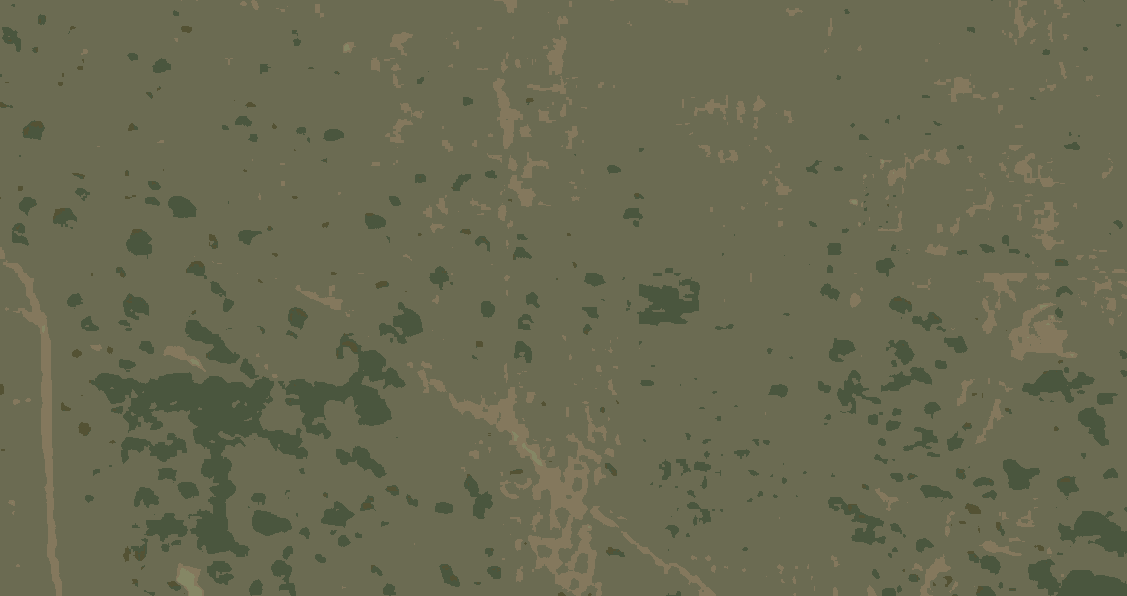

In [13]:
image_copy = image.copy()
image_size = image.width * image.height

for row_nr in range(image_copy.height):
    for col_nr in range(image_copy.width):
        position = (col_nr, row_nr)
        pixel = image.getpixel(position)
        
        norm_func = lambda color: np.linalg.norm(np.array(color) - np.array(pixel))
        best_fit = tuple(palette[np.argmin(np.array(list(map(norm_func, palette))))])
        
        image_copy.putpixel(position, best_fit)


image_copy.save(TEST_IMAGE + "new.png")
image_to_list = list(image_copy.getdata())

display(image_copy)
    

In [193]:
image_to_list = list(image_copy.getdata())
percentage_list = []

def percentage_crop(percentage):
    string = str(percentage)
    
    if len(string) < 6:
        return string
    else:
        return string[:5]

for i in range(MOST_GREEN):
    if used_colors[i]:
        percentage_list.append(100 * image_to_list.count(palette[i]) / image_size)
        
        print(f'Percentage of palette[{i}]: {percentage_crop(percentage_list[-1])}%')

'''
first_green_percentage = 100 * image_to_list.count(palette[0]) / image_size
secondary_green_percentage = 100 * image_to_list.count(palette[1]) / image_size

print(f'Main green: {first_green_percentage}%')
print(f'Secondary green: {secondary_green_percentage}%')
'''

print(f'Total coverage: {percentage_crop(sum(percentage_list))}%')

Percentage of palette[0]: 16.70%
Percentage of palette[1]: 2.522%
Total coverage: 19.23%
